In [1]:
!pip install mmcv

     |████████████████████████████████| 295 kB 905 kB/s eta 0:00:01
     |████████████████████████████████| 185 kB 3.7 MB/s eta 0:00:01
  Created wheel for mmcv: filename=mmcv-1.3.4-py2.py3-none-any.whl size=426558 sha256=f02f4d097223bf7a0f987b10562d99ac794fd617153945775e1a9235d7f65244
  Stored in directory: /root/.cache/pip/wheels/7c/32/6c/e54dfd9b53986cefcbcafe9030f0424c0fd368621b873c4d55
Successfully built mmcv
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
# import subprocess

# ## define your paths
# path1 = '../input/trimmed-ucf-part-1'
# path2 = '../input/trimmed-ucf-part-2'

# ## where to place the merged data
# merged_path = './merged_data'


# ## write an rsync commands to merge the directories
# rsync_cmd = 'rsync' + ' -avzh ' + path1 + ' ' + path2 + ' ' + merged_path

# ## run the rsync command
# subprocess.run(rsync_cmd, shell=True)

In [2]:
from distutils.dir_util import copy_tree

# copy subdirectory example
fromDirectory = '../input/trimmed-ucf-part-1'
toDirectory = './merged_data'

copy_tree(fromDirectory, toDirectory)

['./merged_data/Robbery117_x264_incident_0.mp4',
 './merged_data/Arrest008_x264_incident_0.mp4',
 './merged_data/Arrest035_x264_incident_1.mp4',
 './merged_data/Explosion009_x264_incident_0.mp4',
 './merged_data/Burglary040_x264_incident_2.mp4',
 './merged_data/Fighting007_x264_incident_1.mp4',
 './merged_data/Abuse017_x264_incident_3.mp4',
 './merged_data/RoadAccidents013_x264_incident_0.mp4',
 './merged_data/RoadAccidents109_x264_incident_0.mp4',
 './merged_data/Fighting043_x264_incident_0.mp4',
 './merged_data/RoadAccidents036_x264_incident_0.mp4',
 './merged_data/Fighting043_x264_incident_1.mp4',
 './merged_data/Fighting046_x264_incident_0.mp4',
 './merged_data/Abuse050_x264_incident_7.mp4',
 './merged_data/Robbery136_x264_incident_0.mp4',
 './merged_data/Abuse014_x264_incident_0.mp4',
 './merged_data/Assault049_x264_incident_1.mp4',
 './merged_data/RoadAccidents028_x264_incident_0.mp4',
 './merged_data/Assault016_x264_incident_0.mp4',
 './merged_data/Arson015_x264_incident_0.mp4',

In [3]:
# copy subdirectory example
fromDirectory = '../input/trimmed-ucf-part-2'
toDirectory = './merged_data'

copy_tree(fromDirectory, toDirectory)

['./merged_data/Vandalism029_x264_incident_0.mp4',
 './merged_data/Vandalism046_x264_incident_0.mp4',
 './merged_data/Shoplifting009_x264_incident_1.mp4',
 './merged_data/Shooting017_x264_incident_0.mp4',
 './merged_data/Normal_Videos_781_x264.mp4',
 './merged_data/Stealing032_x264_incident_0.mp4',
 './merged_data/Stealing075_x264_incident_0.mp4',
 './merged_data/Shoplifting040_x264_incident_0.mp4',
 './merged_data/Normal_Videos_696_x264.mp4',
 './merged_data/Vandalism008_x264_incident_0.mp4',
 './merged_data/Stealing105_x264_incident_0.mp4',
 './merged_data/Shoplifting003_x264_incident_2.mp4',
 './merged_data/Shoplifting041_x264_incident_2.mp4',
 './merged_data/Stealing072_x264_incident_0.mp4',
 './merged_data/Vandalism013_x264_incident_0.mp4',
 './merged_data/Stealing063_x264_incident_0.mp4',
 './merged_data/Shoplifting030_x264_incident_0.mp4',
 './merged_data/Shooting052_x264_incident_0.mp4',
 './merged_data/Shooting027_x264_incident_0.mp4',
 './merged_data/Shooting054_x264_incident

In [4]:
!nvidia-smi

Fri May 21 16:04:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.06    Driver Version: 450.51.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import mxnet as mx
a = mx.nd.ones((2, 3), mx.gpu())
b = a * 2 + 1
b.asnumpy()

In [5]:
from __future__ import division

import argparse, time, logging, os, sys, math

import numpy as np
import mxnet as mx
import gluoncv as gcv
from mxnet import gluon, nd, init, context
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms

from gluoncv.data.transforms import video
from gluoncv.data import VideoClsCustom
from gluoncv.model_zoo import get_model
from gluoncv.utils import makedirs, LRSequential, LRScheduler, split_and_load, TrainingHistory

In [6]:
num_gpus = 1
ctx = [mx.gpu(i) for i in range(num_gpus)]
transform_train = video.VideoGroupTrainTransform(size=(224, 224), scale_ratios=[1.0, 0.8], mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
per_device_batch_size = 15
num_workers = 0
batch_size = per_device_batch_size * num_gpus

train_dataset = VideoClsCustom(root=os.path.expanduser('./merged_data'),
                               setting=os.path.expanduser('../input/trimmed-ucf-annotations/gluon_annotations_with_normal.txt'),
                               train=True,
                               new_length=64,#32
                               video_loader=True,
#                                slowfast=True,
#                                slow_temporal_stride=16,
#                                fast_temporal_stride=2,
                               transform=transform_train)
print('Load %d training samples.' % len(train_dataset))
train_data = gluon.data.DataLoader(train_dataset, batch_size=batch_size,
                                   shuffle=True, num_workers=num_workers)

Load 1252 training samples.


In [7]:
net = get_model(name='slowfast_4x16_resnet50_custom',pretrained=False, pretrained_base=True, nclass=14)
#net = get_model(name='i3d_resnet50_v1_custom', nclass=14, use_kinetics_pretrain=True)
net.collect_params().reset_ctx(ctx)
print(net)

100%|██████████| 134964/134964 [00:06<00:00, 20415.45KB/s]


SlowFast(
  (fast_conv1): Conv3D(3 -> 8, kernel_size=(5, 7, 7), stride=(1, 2, 2), padding=(2, 3, 3), bias=False)
  (fast_bn1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
  (fast_relu): Activation(relu)
  (fast_maxpool): MaxPool3D(size=(1, 3, 3), stride=(1, 2, 2), padding=(0, 1, 1), ceil_mode=False, global_pool=False, pool_type=max, layout=NCDHW)
  (fast_res2): HybridSequential(
    (0): Bottleneck(
      (conv1): Conv3D(8 -> 8, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
      (bn1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (conv2): Conv3D(8 -> 8, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), bias=False)
      (bn2): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (conv3): Conv3D(8 -> 32, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
      (bn3): BatchNorm(axis=1,

In [8]:
# Learning rate decay factor
lr_decay = 0.1
# Epochs where learning rate decays
lr_decay_epoch = [40, 80, 100]

# Stochastic gradient descent
optimizer = 'adam'
# Set parameters
optimizer_params = {'learning_rate': 0.0005}

# Define our trainer for net
trainer = gluon.Trainer(net.collect_params(), optimizer, optimizer_params)

In [9]:
loss_fn = gluon.loss.SoftmaxCrossEntropyLoss()

In [10]:
train_metric = mx.metric.Accuracy()
train_history = TrainingHistory(['training-acc'])

[Epoch 0] train=0.284345 loss=2.288256 time: 586.806415
[Epoch 1] train=0.340256 loss=2.068616 time: 567.746322
[Epoch 2] train=0.387380 loss=1.937604 time: 574.056340
[Epoch 3] train=0.399361 loss=1.856032 time: 574.643657
[Epoch 4] train=0.432907 loss=1.778447 time: 575.627506
[Epoch 5] train=0.467252 loss=1.664175 time: 574.000443
[Epoch 6] train=0.514377 loss=1.524291 time: 571.346419
[Epoch 7] train=0.511981 loss=1.517088 time: 566.292867
[Epoch 8] train=0.510383 loss=1.508635 time: 566.205848
[Epoch 9] train=0.567093 loss=1.389572 time: 565.419724
[Epoch 10] train=0.556709 loss=1.379385 time: 564.869089
[Epoch 11] train=0.584665 loss=1.302408 time: 566.440182
[Epoch 12] train=0.600639 loss=1.255633 time: 564.088999
[Epoch 13] train=0.616613 loss=1.207879 time: 567.815412
[Epoch 14] train=0.610224 loss=1.203430 time: 565.098774
[Epoch 15] train=0.651757 loss=1.068481 time: 567.054493
[Epoch 16] train=0.650160 loss=1.097930 time: 565.354742
[Epoch 17] train=0.669329 loss=0.991816 t

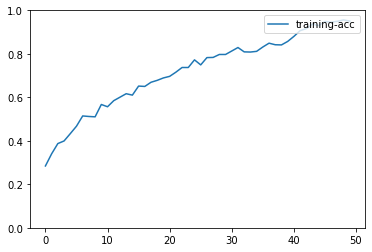

In [11]:
epochs = 50
lr_decay_count = 0

for epoch in range(epochs):
    tic = time.time()
    train_metric.reset()
    train_loss = 0

    # Learning rate decay
    if epoch == lr_decay_epoch[lr_decay_count]:
        trainer.set_learning_rate(trainer.learning_rate*lr_decay)
        lr_decay_count += 1

    # Loop through each batch of training data
    for i, batch in enumerate(train_data):
        # Extract data and label
        data = split_and_load(batch[0], ctx_list=ctx, batch_axis=0)
        label = split_and_load(batch[1], ctx_list=ctx, batch_axis=0)

        # AutoGrad
        with ag.record():
            output = []
            for _, X in enumerate(data):
                X = X.reshape((-1,) + X.shape[2:])
                pred = net(X)
                output.append(pred)
            loss = [loss_fn(yhat, y) for yhat, y in zip(output, label)]

        # Backpropagation
        for l in loss:
            l.backward()

        # Optimize
        trainer.step(batch_size)

        # Update metrics
        train_loss += sum([l.mean().asscalar() for l in loss])
        train_metric.update(label, output)

        if i == 100:
            break

    name, acc = train_metric.get()

    # Update history and print metrics
    train_history.update([acc])
    print('[Epoch %d] train=%f loss=%f time: %f' %
        (epoch, acc, train_loss / (i+1), time.time()-tic))

# We can plot the metric scores with:
train_history.plot()

In [12]:
net.export("ucf_crime_slowfast_4x16_resnet50", epoch=epochs)

RuntimeError: Please first call block.hybridize() and then run forward with this block at least once before calling export.

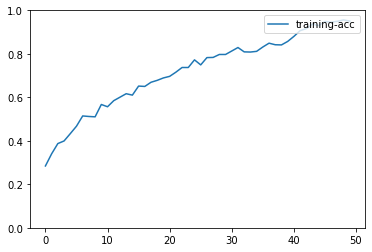

In [13]:
train_history.plot()

In [14]:
val_dataset = VideoClsCustom(root=os.path.expanduser('../input/trimmed-ucf-test'),
                               setting=os.path.expanduser('../input/trimmed-ucf-test-annotations/gluon_annotations.txt'),
                               train=False,
                               new_length=64,#32
                               video_loader=True,
#                                slowfast=True,
#                                slow_temporal_stride=16,
#                                fast_temporal_stride=2,
                               transform=transform_train)
print('Load %d training samples.' % len(val_dataset))
val_data = gluon.data.DataLoader(train_dataset, batch_size=batch_size,
                                   shuffle=False, num_workers=num_workers)

Load 156 training samples.


In [16]:
# Use Accuracy as the evaluation metric.
metric = mx.metric.Accuracy()
# Reset the validation data iterator.
# Loop over the validation data iterator.
for batch in val_data:
    # Splits validation data into multiple slices along batch_axis
    # and copy each slice into a context.
    data = gluon.utils.split_and_load(batch.data[0], ctx_list=ctx, batch_axis=0)
    # Splits validation label into multiple slices along batch_axis
    # and copy each slice into a context.
    label = gluon.utils.split_and_load(batch.label[0], ctx_list=ctx, batch_axis=0)
    outputs = []
    for x in data:
        outputs.append(net(x))
    # Updates internal evaluation
    metric.update(label, outputs)
print('validation acc: %s=%f'%metric.get())

AttributeError: 'list' object has no attribute 'data'

In [21]:
# Use Accuracy as the evaluation metric.
metric = mx.metric.Accuracy()

# Loop through each batch of training data
for i, batch in enumerate(val_data):
    # Extract data and label
    data = split_and_load(batch[0], ctx_list=ctx, batch_axis=0)
    label = split_and_load(batch[1], ctx_list=ctx, batch_axis=0)

    output = []
    for _, X in enumerate(data):
        X = X.reshape((-1,) + X.shape[2:])
        pred = net(X)
        output.append(pred)
    # Updates internal evaluation
    metric.update(label, output)
        
print('validation acc: %s=%f'%metric.get())


validation acc: accuracy=0.983227


In [22]:
file_name = "ucf_crime_slowfast_4x16_resnet50.params"
net.save_parameters(file_name)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session